# Visão Computacional - Introdução ao espaço de cores e lidando com imagens

## 1. Bibliotecas essenciais e suas versões

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1


Vamos agora posicionar o diretório do repositório para a aula respectiva. Nesse caso envie o comando de mudança de diretório.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use("seaborn")
sns.set_style("whitegrid", {"axes.grid": False})

ModuleNotFoundError: No module named 'seaborn'

## 2. Trabalhando com imagens

In [3]:
imagem = cv2.imread("imagens/russia.jpg", cv2.IMREAD_COLOR)

print("comprimento (w): %d pixels" % (imagem.shape[1]))
print("altura (h): %d pixels" % (imagem.shape[0]))
print("canais: %d" % (imagem.shape[2]))

comprimento (w): 1536 pixels
altura (h): 1024 pixels
canais: 3


Exibindo uma imagem utilizando o _Matplotlib_. Neste tipo de exibição é obrigatório a conversão do espaço de cores de BGR para RGB.

In [4]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

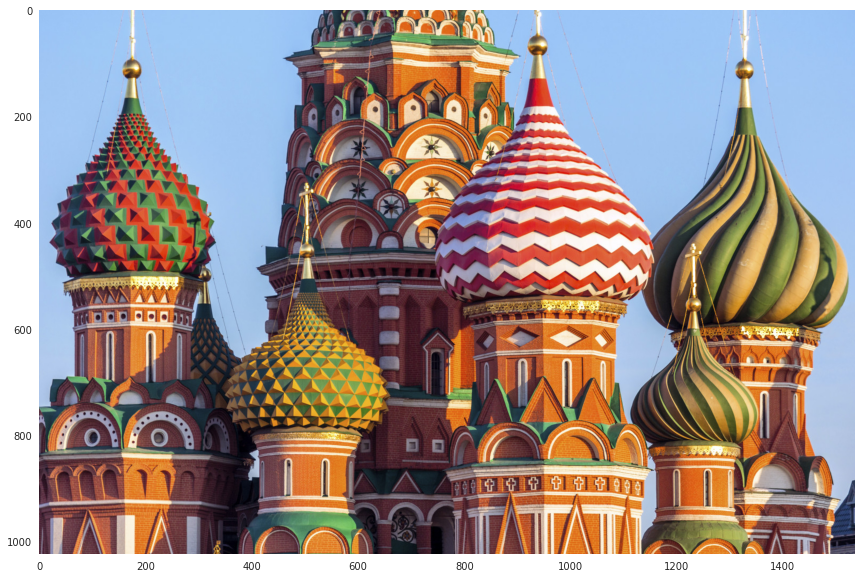

In [5]:
plt.figure(figsize=(20, 10))
plt.imshow(imagem)

Escrevendo o objeto image em outro arquivo

In [6]:
cv2.imwrite("russian_2.jpg", imagem)

True

## 2. Espaço de cores

Espaços de cores são a forma como as imagens são organizados nas matrizes. Existem diversos espaços para diferentes finalidades, como escala de cinza que reduz a dimensionalidade sem perder características de gradientes e formas, RGB mantém cores separadas por canais independentes da mesma forma que o HSV, porém este último, organiza as cores de uma forma que combina a cor, sua intensidade e luminosidade.

### 2.1 RGB

A representação da imagem aberta é (1536, 1028, 3), sendo o último parâmetro o número de canais, um para cada cor do RGB.

In [7]:
(r, g, b) = imagem[0, 0]
print("Pixel at (0, 0) - Red: %d, Green: %d, Blue: %d" % (r, g, b))

Pixel at (0, 0) - Red: 152, Green: 194, Blue: 244


In [8]:
imagem[0:50, 0:50] = (0, 0, 255)
(r, g, b) = imagem[0, 0]
print("Pixel at (0, 0) - Red: %d, Green: %d, Blue: %d" % (r, g, b))

Pixel at (0, 0) - Red: 0, Green: 0, Blue: 255


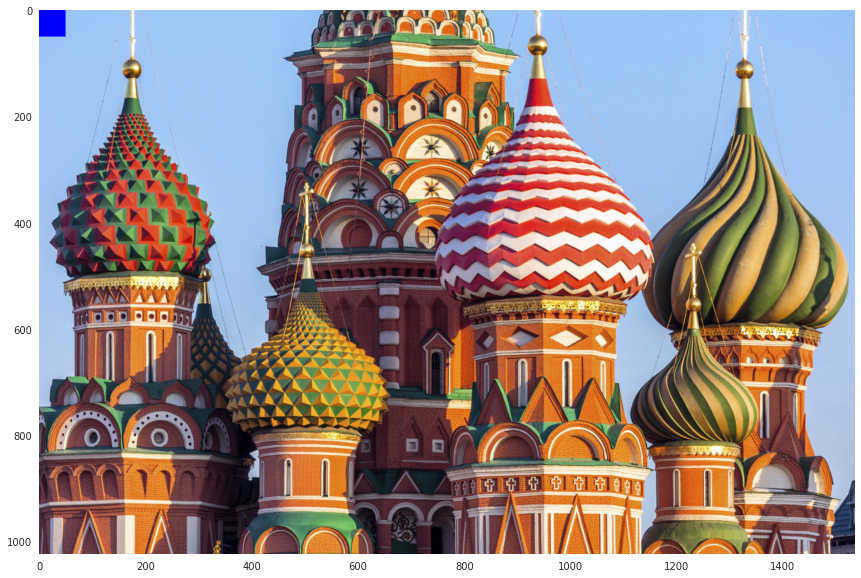

In [9]:
plt.figure(figsize=(20, 10))
plt.imshow(imagem)

### 2.2 Escala de cinza

Conversão de uma imagem em escala de cinza

In [10]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

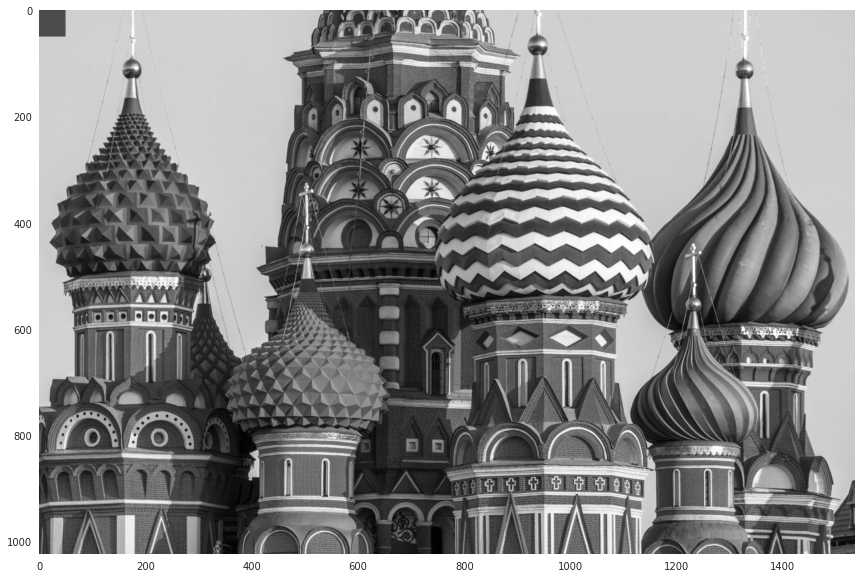

In [11]:
plt.figure(figsize=(20, 10))
plt.imshow(imagem_gray, cmap="gray")

In [12]:
g = imagem_gray[0, 0]
print("Pixel at (0, 0) - Grayscale: %d" % (g))

Pixel at (0, 0) - Grayscale: 76


In [13]:
imagem_gray.shape

(1024, 1536)

In [14]:
imagem.shape

(1024, 1536, 3)

In [15]:
r, g, b = cv2.split(imagem)

Text(0.5, 1.0, 'Russia RGB')

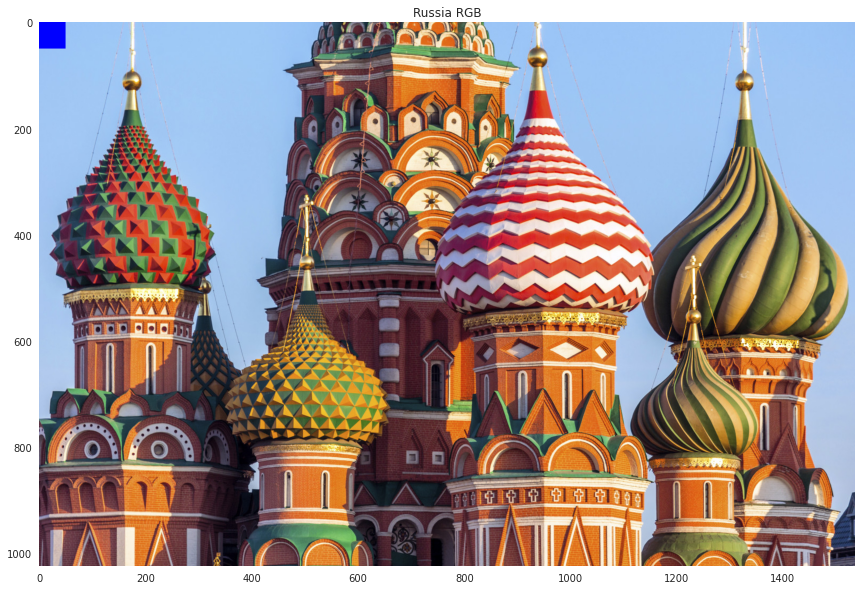

In [16]:
plt.figure(figsize=(20, 10))
plt.imshow(imagem)
plt.title("Russia RGB")

Text(0.5, 1.0, 'Russia Blue')

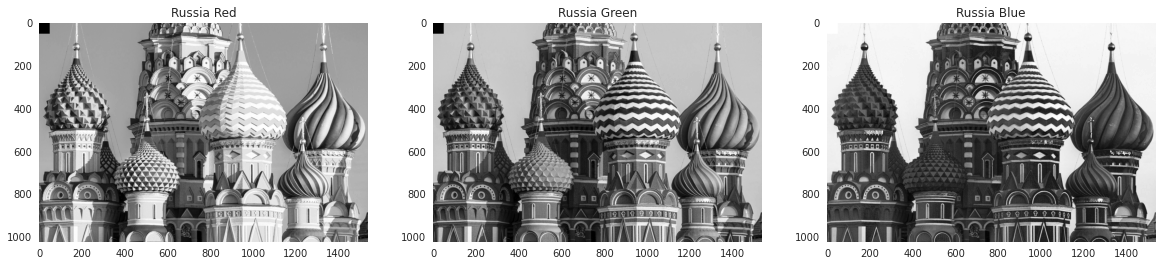

In [17]:
plt.figure(figsize=(20, 20))

# Composição Vermelha
plt.subplot(1, 3, 1)
plt.imshow(r, cmap="gray")
plt.title("Russia Red")

# Composição Verde
plt.subplot(1, 3, 2)
plt.imshow(g, cmap="gray")
plt.title("Russia Green")

# Composição Azul
plt.subplot(1, 3, 3)
plt.imshow(b, cmap="gray")
plt.title("Russia Blue")

Utilizando a função merge para combinar as componentes de cores e trazer sua visualização original.

*Referência documentação do [OpenCV](https://docs.opencv.org/3.1.0/d3/df2/tutorial_py_basic_ops.html).*

In [18]:
r, g, b = cv2.split(imagem)
imagem_vazia = np.zeros(imagem.shape[:2], dtype=np.uint8)

Text(0.5, 1.0, 'Russia Blue')

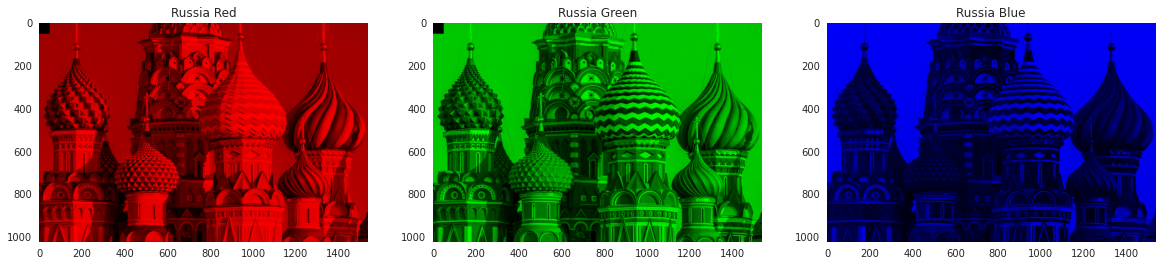

In [19]:
plt.figure(figsize=(20, 20))

plt.subplot(1, 3, 1)
plt.imshow(cv2.merge([r, imagem_vazia, imagem_vazia]))
plt.title("Russia Red")

plt.subplot(1, 3, 2)
plt.imshow(cv2.merge([imagem_vazia, g, imagem_vazia]))
plt.title("Russia Green")

plt.subplot(1, 3, 3)
plt.imshow(cv2.merge([imagem_vazia, imagem_vazia, b]))
plt.title("Russia Blue")

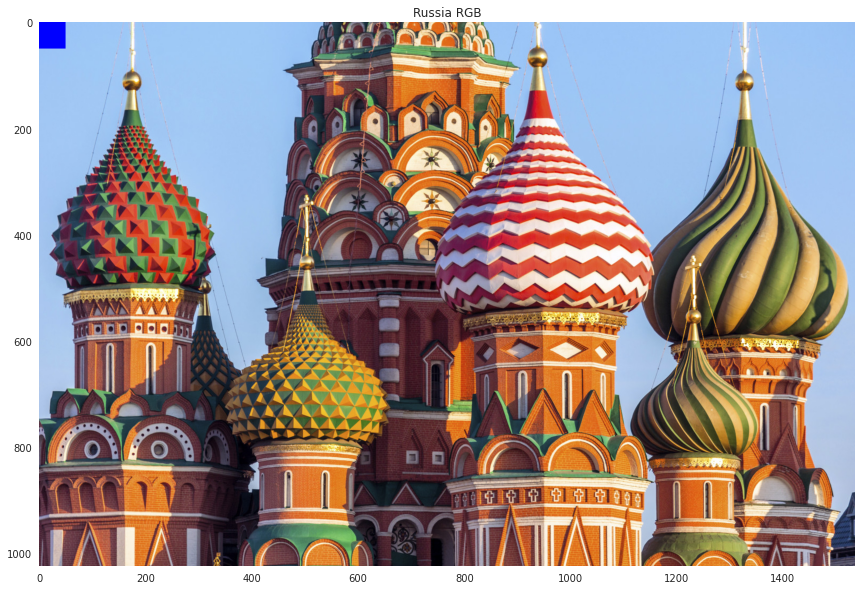

In [20]:
imagem_merged = cv2.merge([r, g, b])

plt.figure(figsize=(20, 10))
plt.title("Russia RGB")
plt.imshow(imagem_merged)

In [21]:
r, g, b = cv2.split(imagem)

Uma vez que é possível separar cada componente de imagem, também podemos interagir com estes valores para aumentar a intensidade de cada componente.
Note que isso pode resultar em saturações, que é quando um determinado pixel atinge seu valor máximo.

Text(0.5, 1.0, 'Intensificado Vermelho')

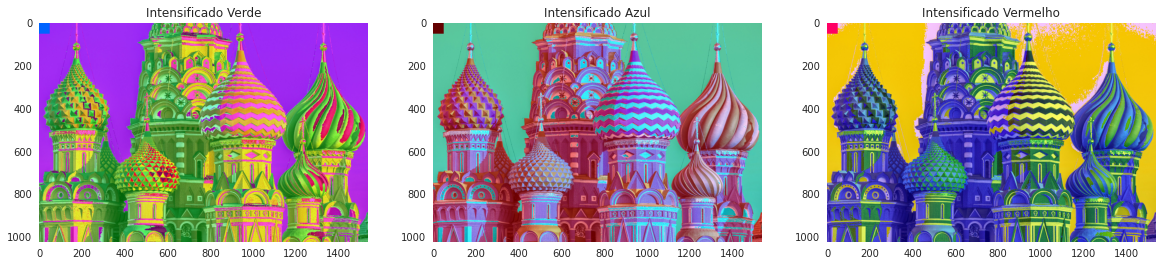

In [22]:
plt.figure(figsize=(20, 20))

# Intensificando o componente verde da imagem
plt.subplot(1, 3, 1)
plt.imshow(cv2.merge([r, g + 100, b]))
plt.title("Intensificado Verde")

# Intensificando o componente azul da imagem
plt.subplot(1, 3, 2)
plt.imshow(cv2.merge([b + 100, g, r]))
plt.title("Intensificado Azul")

# Intensificando o componente vermelho da imagem
plt.subplot(1, 3, 3)
plt.imshow(cv2.merge([b, g, r + 100]))
plt.title("Intensificado Vermelho")

### 2.3 HSV

Manipulando imagem no espaço HSV

In [23]:
imagem_hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

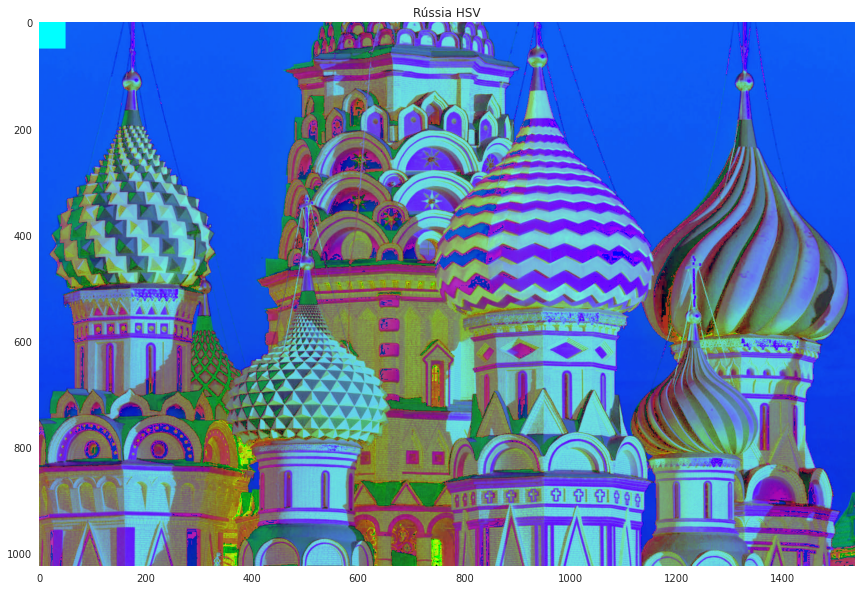

In [24]:
plt.figure(figsize=(20, 10))
plt.title("Rússia HSV")
plt.imshow(imagem_hsv)

Text(0.5, 1.0, 'Russia Hue (Matiz)')

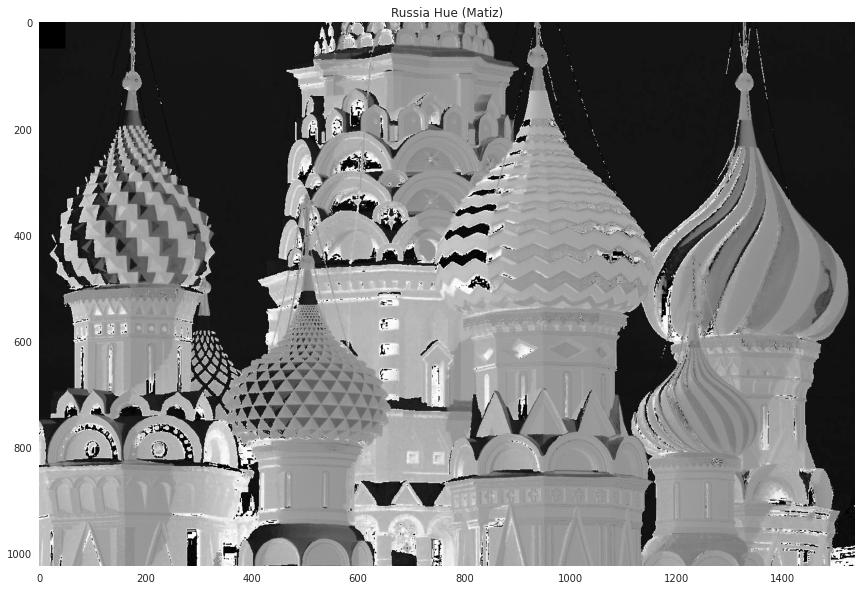

In [25]:
plt.figure(figsize=(20, 10))
plt.imshow(imagem_hsv[:, :, 0], cmap="gray")
plt.title("Russia Hue (Matiz)")

Text(0.5, 1.0, 'Russia Saturation (Saturação)')

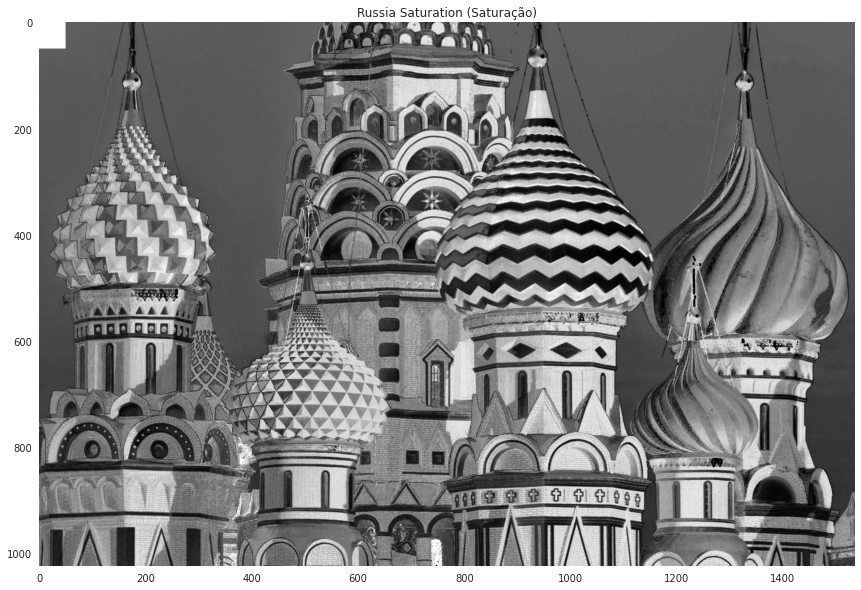

In [26]:
plt.figure(figsize=(20, 10))
plt.imshow(imagem_hsv[:, :, 1], cmap="gray")
plt.title("Russia Saturation (Saturação)")

Text(0.5, 1.0, 'Russia Value (Brilho)')

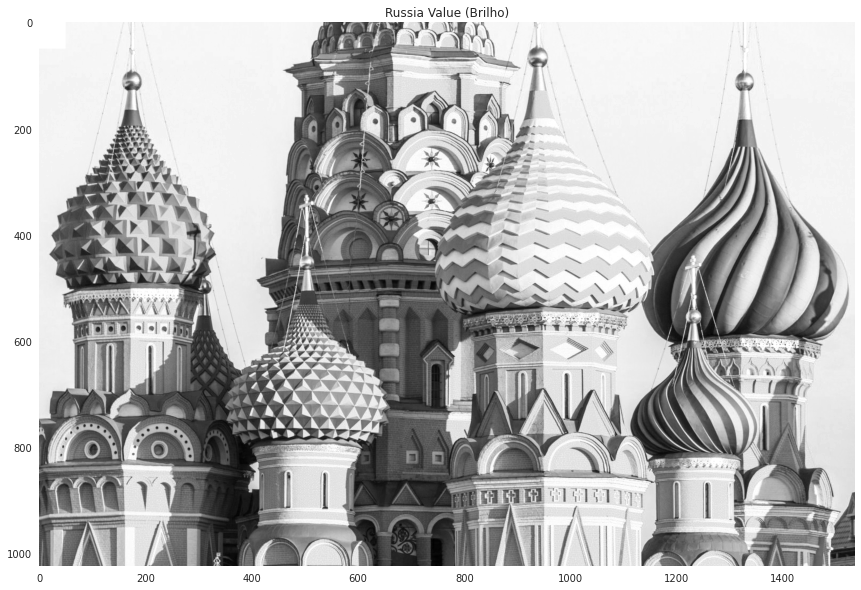

In [27]:
plt.figure(figsize=(20, 10))
plt.imshow(imagem_hsv[:, :, 2], cmap="gray")
plt.title("Russia Value (Brilho)")

Manipulando imagem no espaço RGB

*A função split separa de uma imagem RGB (ou BGR) suas componetnes R, G e B.*